In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv('column_2C_weka.csv')
df

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [11]:
df.isna().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [12]:
data=df.drop('class',1)
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [13]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_scaled=sc.fit_transform(data)
data_sc=pd.DataFrame(data_scaled,index=data.index,columns=data.columns)
data_sc

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106
...,...,...,...,...,...,...
305,-0.731786,-0.392921,-0.860010,-0.646718,-0.035469,-0.814491
306,-0.381197,0.318116,-1.225991,-0.726682,-0.267362,-0.712503
307,0.055201,0.515618,-0.310977,-0.313564,0.582893,-0.773488
308,-0.885823,-0.885660,-0.558613,-0.477128,0.047021,-0.695548


In [15]:
clust_mod=KMeans(n_clusters=3,random_state=0)
clust_mod.fit(data_sc)
clust_mod

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

K: 1
1859.9999999999998
K: 2
1151.9400297822267
K: 3
929.7095052073223
K: 4
802.6962518620446
K: 5
706.5469578559797
K: 6
630.5137532442457
K: 7
579.0114865410601
K: 8
536.4066189415098


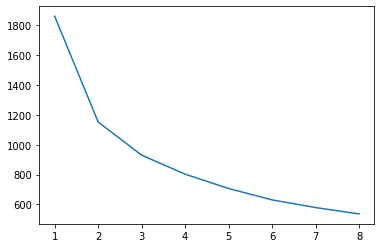

In [17]:
wcsse=[]
cl=[1,2,3,4,5,6,7,8]
for i in cl:
    mod=KMeans(n_clusters=i,random_state=0)
    mod.fit(data_sc)
    print('K:',i)
    print(mod.inertia_) #inertia value
    wcsse.append(mod.inertia_)

plt.plot(cl,wcsse)
plt.show()

In [18]:
knn=KMeans(n_clusters=2)
mod=knn.fit(data_sc)
mod.labels_

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [21]:
data_KMean=data_sc.copy()
data_KMean

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106
...,...,...,...,...,...,...
305,-0.731786,-0.392921,-0.860010,-0.646718,-0.035469,-0.814491
306,-0.381197,0.318116,-1.225991,-0.726682,-0.267362,-0.712503
307,0.055201,0.515618,-0.310977,-0.313564,0.582893,-0.773488
308,-0.885823,-0.885660,-0.558613,-0.477128,0.047021,-0.695548


In [23]:
data_KMean['Labels']=mod.labels_
data_KMean

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,Labels
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,0
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,0
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,1
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,1
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,0
...,...,...,...,...,...,...,...
305,-0.731786,-0.392921,-0.860010,-0.646718,-0.035469,-0.814491,0
306,-0.381197,0.318116,-1.225991,-0.726682,-0.267362,-0.712503,0
307,0.055201,0.515618,-0.310977,-0.313564,0.582893,-0.773488,0
308,-0.885823,-0.885660,-0.558613,-0.477128,0.047021,-0.695548,0


In [20]:
clust_agg=AgglomerativeClustering(n_clusters=2)
clust_agg.fit(data_sc)
clust_agg.labels_


array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [22]:
data_Agg=data_sc.copy()
data_Agg

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106
...,...,...,...,...,...,...
305,-0.731786,-0.392921,-0.860010,-0.646718,-0.035469,-0.814491
306,-0.381197,0.318116,-1.225991,-0.726682,-0.267362,-0.712503
307,0.055201,0.515618,-0.310977,-0.313564,0.582893,-0.773488
308,-0.885823,-0.885660,-0.558613,-0.477128,0.047021,-0.695548


In [24]:
data_Agg['Labels']=clust_agg.labels_
data_Agg

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,Labels
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,0
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,1
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,0
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,0
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,1
...,...,...,...,...,...,...,...
305,-0.731786,-0.392921,-0.860010,-0.646718,-0.035469,-0.814491,1
306,-0.381197,0.318116,-1.225991,-0.726682,-0.267362,-0.712503,1
307,0.055201,0.515618,-0.310977,-0.313564,0.582893,-0.773488,1
308,-0.885823,-0.885660,-0.558613,-0.477128,0.047021,-0.695548,1


In [ ]:
find pattern and the best value for the following features.
?????????????????

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [34]:
data_KMean

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,Labels
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,0
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,0
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,1
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,1
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,0
...,...,...,...,...,...,...,...
305,-0.731786,-0.392921,-0.860010,-0.646718,-0.035469,-0.814491,0
306,-0.381197,0.318116,-1.225991,-0.726682,-0.267362,-0.712503,0
307,0.055201,0.515618,-0.310977,-0.313564,0.582893,-0.773488,0
308,-0.885823,-0.885660,-0.558613,-0.477128,0.047021,-0.695548,0


In [35]:
inp=data_KMean.drop('Labels',1)
out=data_KMean['Labels']

In [36]:
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,random_state=1)

In [38]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.946236559139785

In [41]:
data_Agg

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,Labels
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,0
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,1
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,0
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,0
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,1
...,...,...,...,...,...,...,...
305,-0.731786,-0.392921,-0.860010,-0.646718,-0.035469,-0.814491,1
306,-0.381197,0.318116,-1.225991,-0.726682,-0.267362,-0.712503,1
307,0.055201,0.515618,-0.310977,-0.313564,0.582893,-0.773488,1
308,-0.885823,-0.885660,-0.558613,-0.477128,0.047021,-0.695548,1


In [42]:
inp=data_Agg.drop('Labels',1)
out=data_Agg['Labels']

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
accuracy_score(ytest,ypred)

0.967741935483871

In [45]:
from scipy.cluster.hierarchy import linkage

In [46]:
merg=linkage(data_sc)
merg

array([[2.92000000e+02, 3.03000000e+02, 2.04509297e-01, 2.00000000e+00],
       [5.00000000e+00, 2.62000000e+02, 2.25446912e-01, 2.00000000e+00],
       [1.05000000e+02, 2.44000000e+02, 2.36823323e-01, 2.00000000e+00],
       ...,
       [1.63000000e+02, 6.15000000e+02, 2.25194605e+00, 3.08000000e+02],
       [1.62000000e+02, 6.16000000e+02, 2.28158088e+00, 3.09000000e+02],
       [1.15000000e+02, 6.17000000e+02, 1.01381808e+01, 3.10000000e+02]])

In [50]:
df1=pd.DataFrame(merg)
df1

,0,1,2,3
0,292.0,303.0,0.204509,2.0
1,5.0,262.0,0.225447,2.0
2,105.0,244.0,0.236823,2.0
3,153.0,222.0,0.240850,2.0
4,256.0,267.0,0.241908,2.0
...,...,...,...,...
304,51.0,613.0,1.895254,306.0
305,197.0,614.0,2.251535,307.0
306,163.0,615.0,2.251946,308.0
307,162.0,616.0,2.281581,309.0


In [51]:
df1.iloc[0,:]

0    292.000000
1    303.000000
2      0.204509
3      2.000000
Name: 0, dtype: float64

In [55]:
df1[df1[3]==3]

,0,1,2,3
11,263.0,310.0,0.304139,3.0
17,305.0,319.0,0.330084,3.0
28,19.0,329.0,0.355974,3.0
31,260.0,314.0,0.361685,3.0
38,268.0,343.0,0.377520,3.0
41,259.0,339.0,0.380735,3.0
42,212.0,340.0,0.382020,3.0
46,46.0,342.0,0.411130,3.0
47,248.0,316.0,0.414319,3.0
62,8.0,336.0,0.446081,3.0


In [56]:
from scipy.cluster.hierarchy import dendrogram

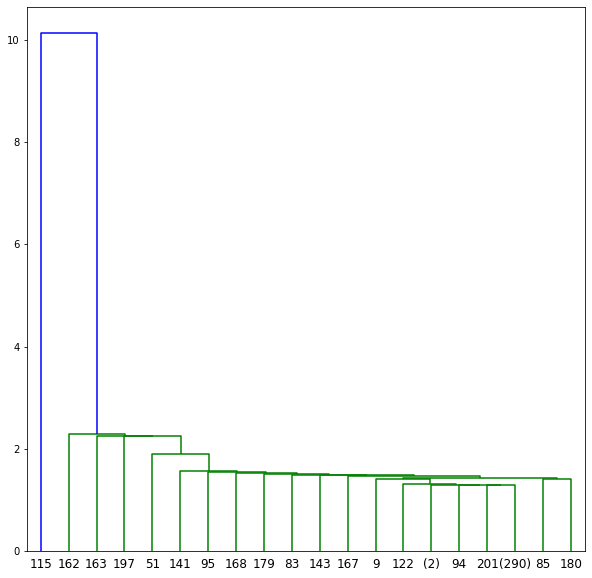

In [60]:
plt.figure(figsize=(10,10))
dendrogram(merg,truncate_mode='lastp',p=20) 
plt.show()

In [61]:
merg_complete=linkage(data_sc,method='complete')
merg_average=linkage(data_sc,method='average')
merg_ward=linkage(data_sc,method='ward')

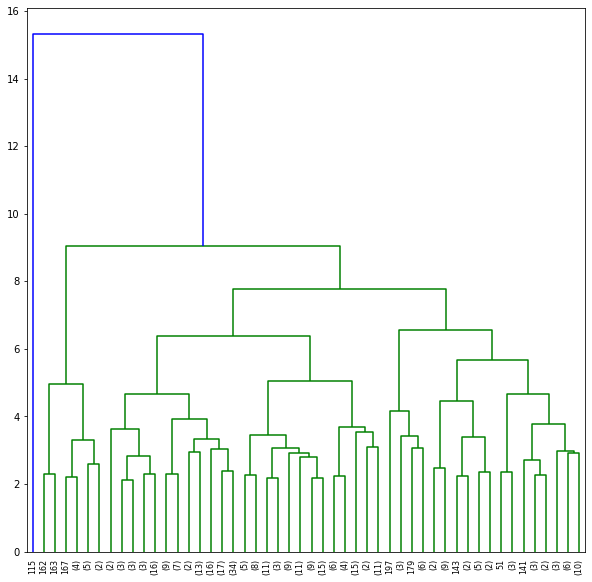

In [67]:
plt.figure(figsize=(10,10))
dendrogram(merg_complete,truncate_mode='lastp',p=50) 
plt.show()

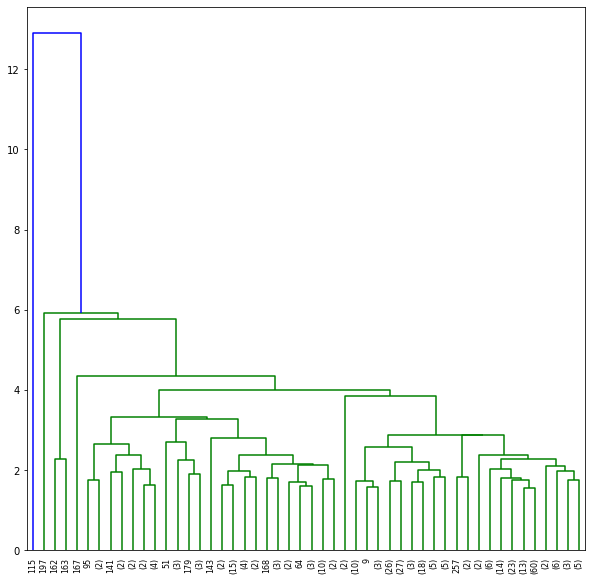

In [68]:
plt.figure(figsize=(10,10))
dendrogram(merg_average,truncate_mode='lastp',p=50) 
plt.show()

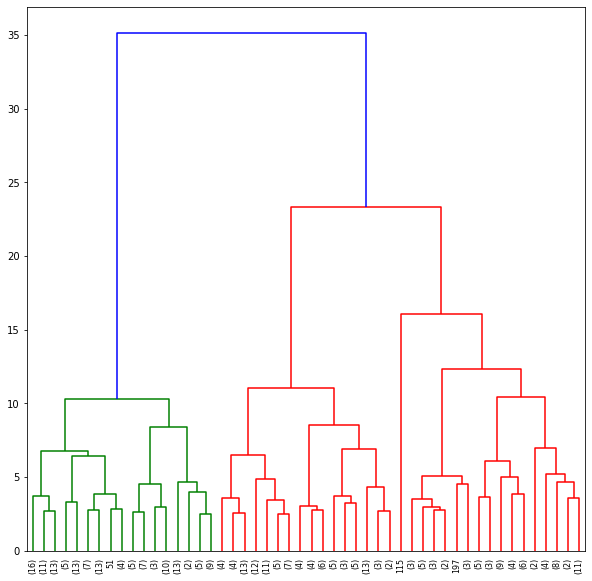

In [69]:
plt.figure(figsize=(10,10))
dendrogram(merg_ward,truncate_mode='lastp',p=50) 
plt.show()

In [74]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [75]:
cophenet(merg_ward,pdist(data_sc))


(0.48007419081723585,
 array([35.15449332,  1.58369356,  1.58369356, ..., 10.29415754,
         8.38256457, 10.29415754]))

In [77]:
from scipy.cluster.hierarchy import fcluster

In [82]:
range_val=np.arange(1,35,1)

In [83]:
for i in range_val: 
    n_clust=fcluster(merg_ward,i,criterion='distance')
    print('No of cluster for the distance of',i,'is ',len(np.unique(n_clust)))

No of cluster for the distance of 1 is  160
No of cluster for the distance of 2 is  67
No of cluster for the distance of 3 is  38
No of cluster for the distance of 4 is  26
No of cluster for the distance of 5 is  18
No of cluster for the distance of 6 is  16
No of cluster for the distance of 7 is  10
No of cluster for the distance of 8 is  10
No of cluster for the distance of 9 is  8
No of cluster for the distance of 10 is  8
No of cluster for the distance of 11 is  6
No of cluster for the distance of 12 is  5
No of cluster for the distance of 13 is  4
No of cluster for the distance of 14 is  4
No of cluster for the distance of 15 is  4
No of cluster for the distance of 16 is  4
No of cluster for the distance of 17 is  3
No of cluster for the distance of 18 is  3
No of cluster for the distance of 19 is  3
No of cluster for the distance of 20 is  3
No of cluster for the distance of 21 is  3
No of cluster for the distance of 22 is  3
No of cluster for the distance of 23 is  3
No of clust

In [84]:
n_clust=fcluster(merg_ward,75,criterion='distance')
print('No of cluster for the distance of 75 is ',len(np.unique(n_clust)))

No of cluster for the distance of 75 is  1
